<a href="https://colab.research.google.com/github/divyanshpillai/loan-prediction-system/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
loan_dataset = pd.read_csv('/content/loan_dataset.csv')

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#dropping all the null values
loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_dataset.shape

(480, 13)

#Label Encoding

It means in 'loan_status' column, it replace all the 'N' values with 0 and all the 'Y' values with 1 for the better prediction

In [ ]:
loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace = True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
loan_dataset = loan_dataset.replace(to_replace = '3+', value = 3)

In [ ]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

# Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

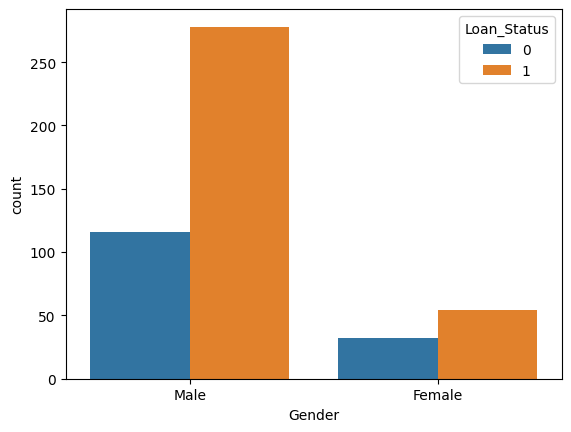

In [ ]:
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

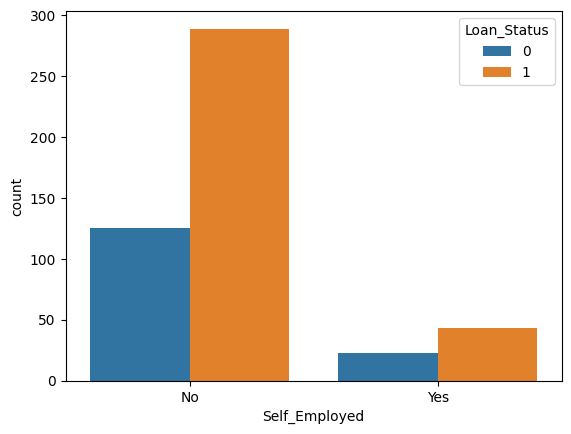

In [ ]:
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

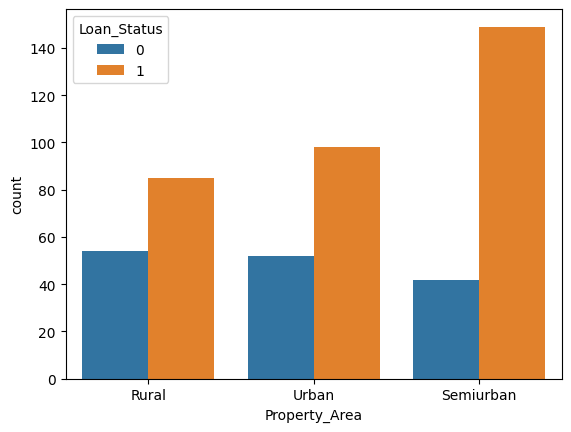

In [ ]:
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

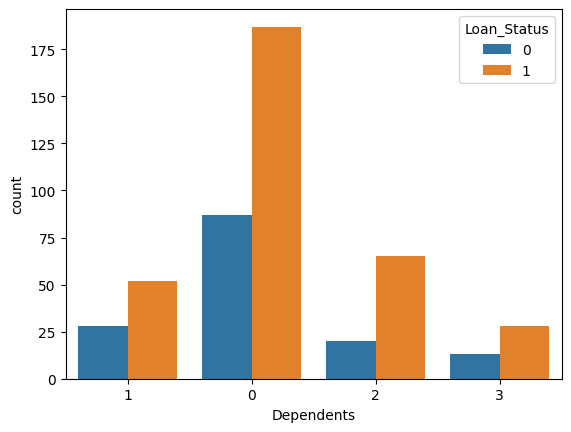

In [ ]:
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = loan_dataset)

**Replacing values of other columns contains textual data with numerical data**

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
loan_dataset.replace({'Married': {'Yes':1, 'No':0}}, inplace = True)

In [ ]:
loan_dataset.replace({'Gender': {'Male':1, 'Female':0}}, inplace = True)

In [ ]:
loan_dataset.replace({'Education': {'Graduate':1, 'Not Graduate':0}}, inplace = True)

In [ ]:
loan_dataset.replace({'Self_Employed': {'No':0, 'Yes':1}}, inplace = True)

In [ ]:
loan_dataset.replace({'Property_Area': {'Rural':0, 'Urban':2, 'Semiurban':1}}, inplace = True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


**Seperating Data (Whole Dataset except Loan_id and Loan_Status) and Label (Loan_Status)**

In [ ]:
loan_dataset['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

In [ ]:
X = loan_dataset.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, train_size = 0.9, random_state = 2, stratify = Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(480, 11) (432, 11) (48, 11) (432,) (48,)


# Training the model

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

In [ ]:
X_train_prediction = classifier.predict(X_train)
train_accuracy_score = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy of training data is", train_accuracy_score)

Accuracy of training data is 0.7685185185185185


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_accuracy_score = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy of testing data is", test_accuracy_score)

Accuracy of testing data is 0.8541666666666666


# Making a Predictive System

In [ ]:
# 1	1	0	0	0	2583	2358.0	120.0	360.0	1.0	2
input = [0, 0, 0, 1, 1, 4583, 0.0, 133.0, 360, 0.0, 1]

input_data_as_numpy_array = np.asarray(input)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction == 1):
  print("This person got the loan")
else:
  print("Unfortunately this person doesn't managed to get the loan")

[0]
Unfortunately this person doesn't managed to get the loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
